In [1]:
import h2o
import pandas as pd
import numpy as np

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.11+9-LTS-194, mixed mode)
  Starting server from C:\Users\Gerd\venvs\h2o\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Gerd\AppData\Local\Temp\tmpb27lg3sm
  JVM stdout: C:\Users\Gerd\AppData\Local\Temp\tmpb27lg3sm\h2o_Gerd_started_from_python.out
  JVM stderr: C:\Users\Gerd\AppData\Local\Temp\tmpb27lg3sm\h2o_Gerd_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,2 months and 10 days
H2O_cluster_name:,H2O_from_python_Gerd_i8jn27
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.975 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
data = h2o.import_file('http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip')
dataframe = data.as_data_frame()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
data.summary()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
type,int,int,int,int,int,int,int,int,enum,int,enum,int,int,int,int,int,enum,enum,int,int,int,int,enum,int,int,int,int,int,int,enum,enum
mins,1987.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,,1.0,,16.0,17.0,14.0,-63.0,-16.0,,,11.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,
mean,1997.5000000000068,1.409090909090916,14.601073263904551,3.8206148528809845,1345.846661382077,1313.2228614307262,1504.634130378886,1485.2891673109345,,818.8429896766576,,124.8145291354039,125.02156260661906,114.31611109078231,9.317111936984306,10.007390655600112,,,730.1821905650557,5.381368059530588,14.16863418473208,0.024694165264450407,,0.0024785119832643593,4.047800291055639,0.2893764692712412,4.8550319041755365,0.0170155602821001,7.620060450016796,,
maxs,2008.0,10.0,31.0,7.0,2400.0,2359.0,2400.0,2359.0,,3949.0,,475.0,437.0,402.0,475.0,473.0,,,3365.0,128.0,254.0,1.0,,1.0,369.0,201.0,323.0,14.0,373.0,,
sigma,6.344360901707349,1.8747113713439618,9.175790425861413,1.9050131191329014,465.3408991242322,476.2511399926005,484.3474879035152,492.75043412270105,,777.4043691636341,,73.97444166059017,73.40159463000951,69.6363295150612,29.840221962414837,26.438809042916418,,,578.4380082304235,4.201979939864826,9.905085747204279,0.15519314135784237,,0.049723487218862286,16.2057299044842,4.416779898734125,18.619776221475654,0.403940182101512,23.48756587410621,,
zeros,0,0,0,0,0,569,0,569,,0,,0,0,0,1514,6393,,,0,623,557,42892,,43869,7344,8840,7388,8914,7140,,
missing,0,0,0,0,1086,0,1195,0,0,0,32,1195,13,16649,1195,1086,0,0,35,16026,16024,0,9774,0,35045,35045,35045,35045,35045,0,0
0,1987.0,10.0,14.0,3.0,741.0,730.0,912.0,849.0,PS,1451.0,NA,91.0,79.0,nan,23.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES
1,1987.0,10.0,15.0,4.0,729.0,730.0,903.0,849.0,PS,1451.0,NA,94.0,79.0,nan,14.0,-1.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,NO
2,1987.0,10.0,17.0,6.0,741.0,730.0,918.0,849.0,PS,1451.0,NA,97.0,79.0,nan,29.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES


In [5]:
data[:, "AirTime"].mean()
data[:, "AirTime"].summary()

,AirTime
type,int
mins,14.0
mean,114.31611109078231
maxs,402.0
sigma,69.6363295150612
zeros,0
missing,16649
0,nan
1,nan
2,nan


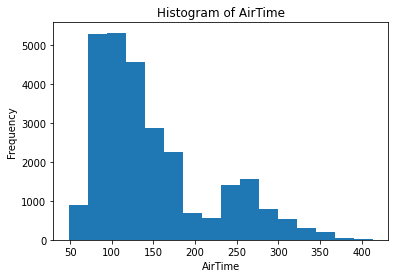

In [9]:
data[:,"AirTime"].hist()

In [10]:
data[:, "ArrDelay"].summary()

,ArrDelay
type,int
mins,-63.0
mean,9.317111936984306
maxs,475.0
sigma,29.840221962414837
zeros,1514
missing,1195
0,23.0
1,14.0
2,29.0


In [1]:
#
# shut down the h2o client cluster
#
h2o.cluster().shutdown()

NameError: name 'h2o' is not defined